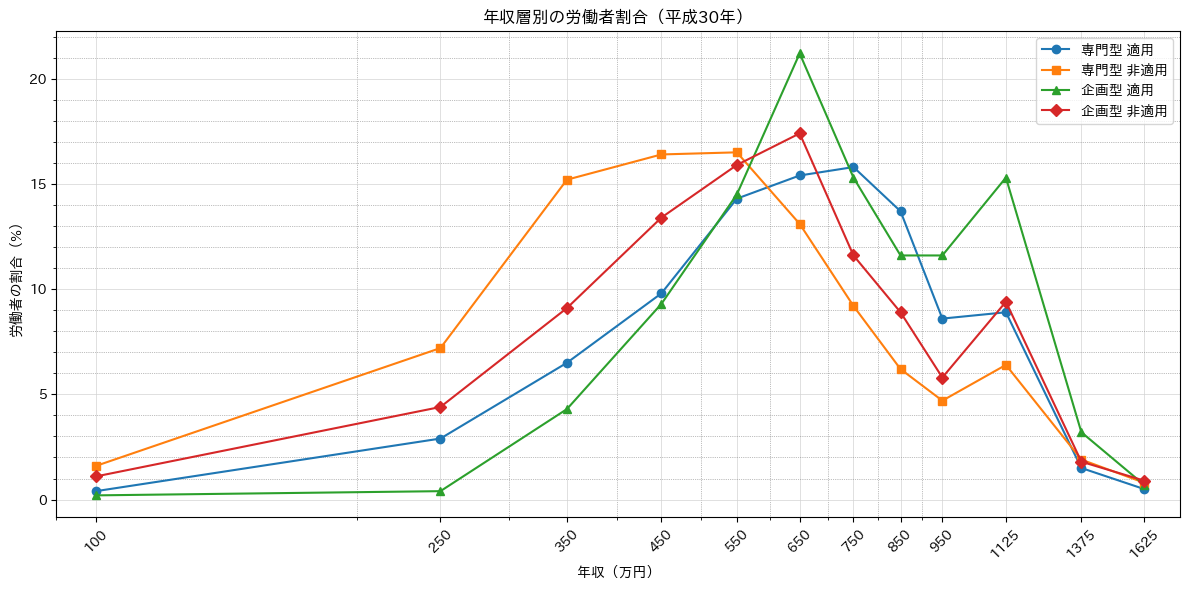

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 年収層の中央値（万円）
income_midpoints = [100, 250, 350, 450, 550, 650, 750, 850, 950, 1125, 1375, 1625]

# データ（順番は年収層の中央値に対応）
specialist_applied = [0.4, 2.9, 6.5, 9.8, 14.3, 15.4, 15.8, 13.7, 8.6, 8.9, 1.5, 0.5]
specialist_not_applied = [1.6, 7.2, 15.2, 16.4, 16.5, 13.1, 9.2, 6.2, 4.7, 6.4, 1.9, 0.8]
planning_applied = [0.2, 0.4, 4.3, 9.3, 14.5, 21.2, 15.3, 11.6, 11.6, 15.3, 3.2, 0.7]
planning_not_applied = [1.1, 4.4, 9.1, 13.4, 15.9, 17.4, 11.6, 8.9, 5.8, 9.4, 1.8, 0.9]

plt.figure(figsize=(12, 6))
plt.plot(income_midpoints, specialist_applied, marker='o', label='専門型 適用')
plt.plot(income_midpoints, specialist_not_applied, marker='s', label='専門型 非適用')
plt.plot(income_midpoints, planning_applied, marker='^', label='企画型 適用')
plt.plot(income_midpoints, planning_not_applied, marker='D', label='企画型 非適用')

plt.xlabel('年収（万円）')
plt.ylabel('労働者の割合（%）')
plt.title('年収層別の労働者割合（平成30年）')
plt.legend()

# メインのグリッドを設定（薄い色）
plt.grid(True, which='both', color='lightgrey', linestyle='-', linewidth=0.5)

# 副グリッド（より細かい）を設定
plt.minorticks_on()
plt.grid(True, which='minor', color='gray', linestyle=':', linewidth=0.5)

plt.xscale('log')
plt.xticks(income_midpoints, [f'{x}' for x in income_midpoints], rotation=45)

# x軸の範囲を設定（データの最小値と最大値に基づいて）
plt.xlim(min(income_midpoints) * 0.9, max(income_midpoints) * 1.1)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


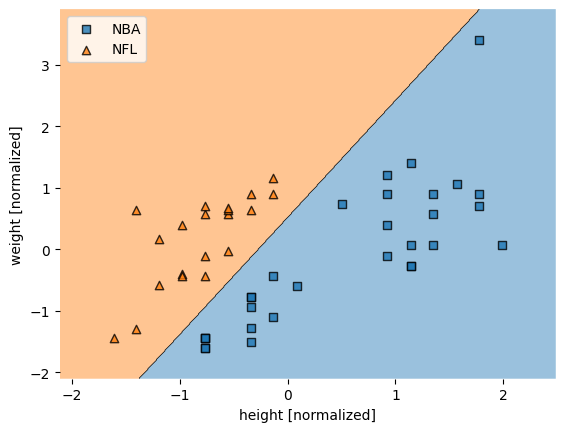

In [3]:
import numpy as np
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
def label_str_to_int(y):  # 目的変数をstr型→int型に変換(plot_decision_regions用)
    label_names = list(dict.fromkeys(y[:, 0]))
    label_dict = dict(zip(label_names, range(len(label_names))))
    y_int=np.vectorize(lambda x: label_dict[x])(y)
    return y_int
def legend_int_to_str(ax, y):  # 凡例をint型→str型に変更(plot_decision_regions用)
    hans, labs = ax.get_legend_handles_labels()
    ax.legend(handles=hans, labels=list(dict.fromkeys(y[:, 0])))

X = df_athelete[['height','weight']].values  # 説明変数(身長、体重)
y = df_athelete[['league']].values  # 目的変数(種目)
stdsc = StandardScaler()  # 標準化用インスタンス
X = stdsc.fit_transform(X)  # 説明変数を標準化
y_int = label_str_to_int(y)  # 目的変数をint型に変換
model = SVC(kernel='linear', C=1000)  # 線形SVMを定義(後述のソフトマージンの影響を減らすためCは大きく)
model.fit(X, y_int)  # SVM学習を実行

ax = plot_decision_regions(X, y_int[:, 0], clf=model, zoom_factor=2) #決定境界を可視化
plt.xlabel('height [normalized]')  # x軸のラベル
plt.ylabel('weight [normalized]')  # y軸のラベル
legend_int_to_str(ax, y)  # 凡例をint型→str型に変更